# Remember that the confidence interval is a likelihood over a range. The true model skill may lie outside of the range.

In [4]:
# binomial confidence interval
from math import sqrt

# calculate the interval
interval = 1.96 * sqrt( (0.2 * (1- 0.2)) / 50)
print('%.3f' % interval)

0.111


In [3]:
# binomial confidence interval
from math import sqrt
interval = 1.96 * sqrt( (0.2 * (1- 0.2)) / 100)
print('%.3f' % interval)

0.078


In [8]:
# calculate the confidence interval
from statsmodels.stats.proportion import proportion_confint
# calculate the interval
lower, upper = proportion_confint(88, 100, 0.05)
print('lower=%.3f, upper=%.3f' % (lower, upper))

lower=0.816, upper=0.944


In [12]:
# bootstrap confidence intervals
from numpy.random import seed, rand, randint
from numpy import mean, median, percentile

# seed the random number generator
seed(1)

# generate dataset
dataset = 0.5 + rand(1000) * 0.5

# bootstrap
scores = list()
for _ in range(100):
    # bootstrap sample
    indices = randint(0, 1000, 1000)
    sample = dataset[indices]
    
    # calculate and store statistic
    statistic = mean(sample)
    scores.append(statistic)

# print median
print('50th percentile (median) = %.3f' % median(scores))

# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0

# calculate lower percentile (e.g. 2.5)
lower_p = alpha / 2.0
lower = max(0.0, percentile(scores, lower_p))
print('%.1fth percentile = %.3f' % (lower_p, lower))

# calculate upper percentile (e.g. 97.5)
upper_p = (100 - alpha) + (alpha / 2.0)
upper = min(1.0, percentile(scores, upper_p))
print('%.1fth percentile = %.3f' % (upper_p, upper))

50th percentile (median) = 0.750
2.5th percentile = 0.741
97.5th percentile = 0.757


# You can say with 95% confidence that the model's true capacity lies within 0.741 and 0.759 range.

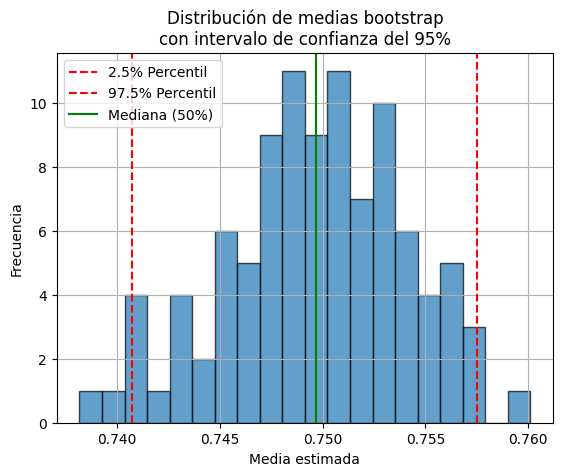

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, rand, randint
from numpy import mean, median, percentile

# Semilla para reproducibilidad
seed(1)

# Crear dataset de 1000 valores entre 0.5 y 1.0
dataset = 0.5 + rand(1000) * 0.5

# Bootstrap: 100 medias de muestras con reemplazo
scores = []
for _ in range(100):
    indices = randint(0, 1000, 1000)
    sample = dataset[indices]
    stat = mean(sample)
    scores.append(stat)

# Calcular percentiles
mediana = median(scores)
lower = percentile(scores, 2.5)
upper = percentile(scores, 97.5)

# 📊 Visualización
plt.hist(scores, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(lower, color='red', linestyle='--', label='2.5% Percentil')
plt.axvline(upper, color='red', linestyle='--', label='97.5% Percentil')
plt.axvline(mediana, color='green', linestyle='-', label='Mediana (50%)')
plt.title('Distribución de medias bootstrap\ncon intervalo de confianza del 95%')
plt.xlabel('Media estimada')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()